# Tarea 1 - AST332: Análisis Exploratorio de Datos (EDA)
Segundo Semestre 2025 - "Análisis del Dataset de Cambio Climático"

.- Constanza Bustos - Juan Sebastián Gutiérrez

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar el dataset desde el archivo CSV proporcionado
datos = pd.read_csv('GlobalTemperatures.csv')
datos.head(10)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN
6,1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN
7,1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN
8,1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN
9,1750-10-01,6.367,2.668,NaN,NaN,NaN,NaN,NaN,NaN


Descripción de las características:


*   **dt**: fecha de registro.
*   **LandAverageTemperature**: temperatura promedio de la superficie terrestre.
*   **LandMaxTemperature**: temperatura máxima registrada en la superficie terrestre.
*   **LandMinTemperature**: temperatura mínima registrada en la superficie terrestre.
*   **LandAndOceanAverageTemperature**: temperatura promedio de la superficie terrestre y el océano.
*   **...TemperatureUncertainty**: incertidumbre de la temperatura registrada.









In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [ ]:
datos.isnull().sum()

,0
dt,0
LandAverageTemperature,12
LandAverageTemperatureUncertainty,12
LandMaxTemperature,1200
LandMaxTemperatureUncertainty,1200
LandMinTemperature,1200
LandMinTemperatureUncertainty,1200
LandAndOceanAverageTemperature,1200
LandAndOceanAverageTemperatureUncertainty,1200


In [ ]:
# Limpieza de datos
datos.dropna(subset=['LandAverageTemperature'], inplace=True)
datos.isnull().sum()

,0
dt,0
LandAverageTemperature,0
LandAverageTemperatureUncertainty,0
LandMaxTemperature,1188
LandMaxTemperatureUncertainty,1188
LandMinTemperature,1188
LandMinTemperatureUncertainty,1188
LandAndOceanAverageTemperature,1188
LandAndOceanAverageTemperatureUncertainty,1188


Los outliers, en este caso, representan eventos climáticos extremos, los que, al analizarlos, aumentarán o disminuirán la temperatura. Estos datos podrían observarse en un gráfico de caja y bigote o boxplot.

In [ ]:
# Análisis estadístico
datos.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


**Realizar un análisis de las distribuciones de las variables más relevantes**: la temperatura promedio terrestre y oceánica es la más estable (presenta menos desviación estandar).

# Visualización

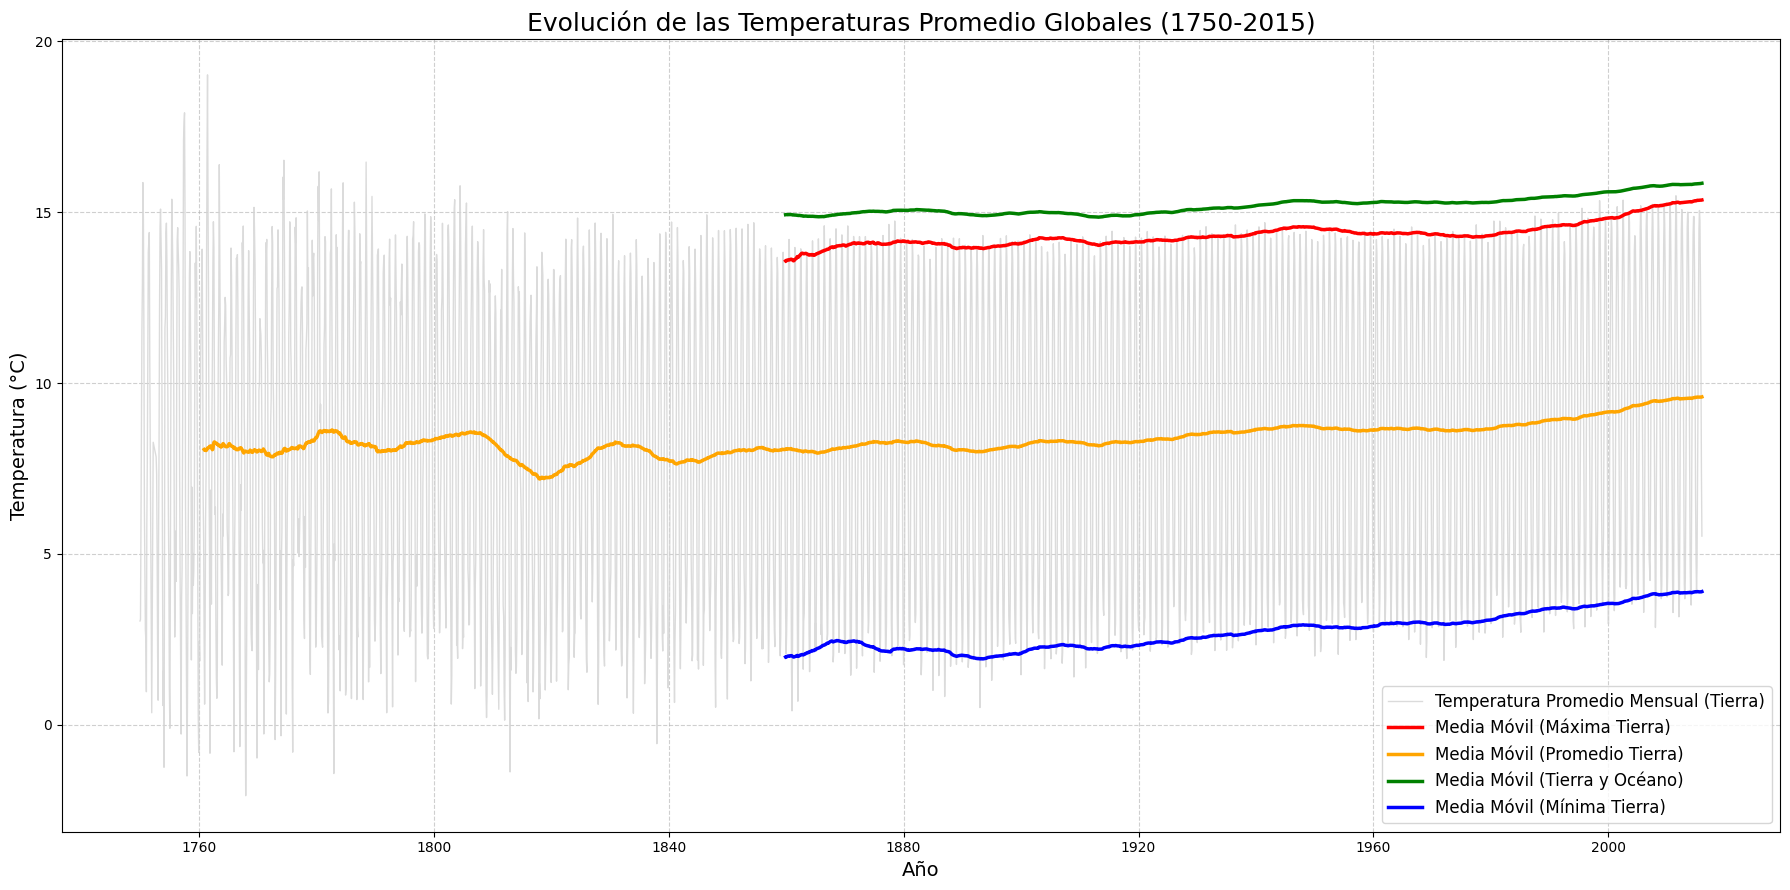

In [ ]:
datos_para_grafico = datos.copy()

datos_para_grafico['dt'] = pd.to_datetime(datos_para_grafico['dt'])

datos_para_grafico['rolling_avg_land'] = datos_para_grafico['LandAverageTemperature'].rolling(window=120).mean()
datos_para_grafico['rolling_avg_land_ocean'] = datos_para_grafico['LandAndOceanAverageTemperature'].rolling(window=120).mean()
datos_para_grafico['rolling_avg_max'] = datos_para_grafico['LandMaxTemperature'].rolling(window=120).mean()
datos_para_grafico['rolling_avg_min'] = datos_para_grafico['LandMinTemperature'].rolling(window=120).mean()

plt.figure(figsize=(18, 9))

plt.plot(datos_para_grafico['dt'], datos_para_grafico['LandAverageTemperature'], label='Temperatura Promedio Mensual (Tierra)', color='lightgray', alpha=0.8, linewidth=1)

plt.plot(datos_para_grafico['dt'], datos_para_grafico['rolling_avg_max'], label='Media Móvil (Máxima Tierra)', color='red', linewidth=2.5)
plt.plot(datos_para_grafico['dt'], datos_para_grafico['rolling_avg_land'], label='Media Móvil (Promedio Tierra)', color='orange', linewidth=2.5)
plt.plot(datos_para_grafico['dt'], datos_para_grafico['rolling_avg_land_ocean'], label='Media Móvil (Tierra y Océano)', color='green', linewidth=2.5)
plt.plot(datos_para_grafico['dt'], datos_para_grafico['rolling_avg_min'], label='Media Móvil (Mínima Tierra)', color='blue', linewidth=2.5)

plt.title('Evolución de las Temperaturas Promedio Globales (1750-2015)', fontsize=18)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Temperatura (°C)', fontsize=14)

plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Análisis**: El gráfico muestra una clara tendencia al alza en las tres métricas, especialmente en los últimos años. Esto es consistente con el calentamiento global, donde la temperatura mínima suele aumentar más rápido que la máxima, reduciendo así, la amplitud térmica. El hecho de que la línea de "Tierra y Océano" esté incluida es crucial, ya que los océanos absorben la mayor parte del calor excedente.

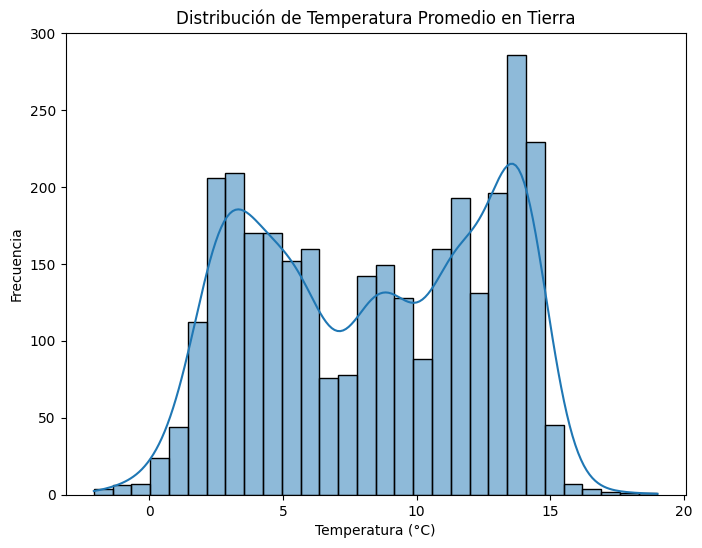

In [ ]:
# Histograma de temperaturas promedio en tierra
plt.figure(figsize=(8,6))
sns.histplot(datos["LandAverageTemperature"].dropna(), bins=30, kde=True)
plt.title("Distribución de Temperatura Promedio en Tierra")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Frecuencia")
plt.show()

**Análisis**: La forma de la distribución nos dice sobre la variabilidad climática. Podemos ver como la mayor frecuencia de temperatura en los datos entregados es de aproximadamente 14. Un desplazamiento de la campana hacia la derecha (temperaturas más altas) en comparación con datos históricos sería una señal clara de calentamiento.

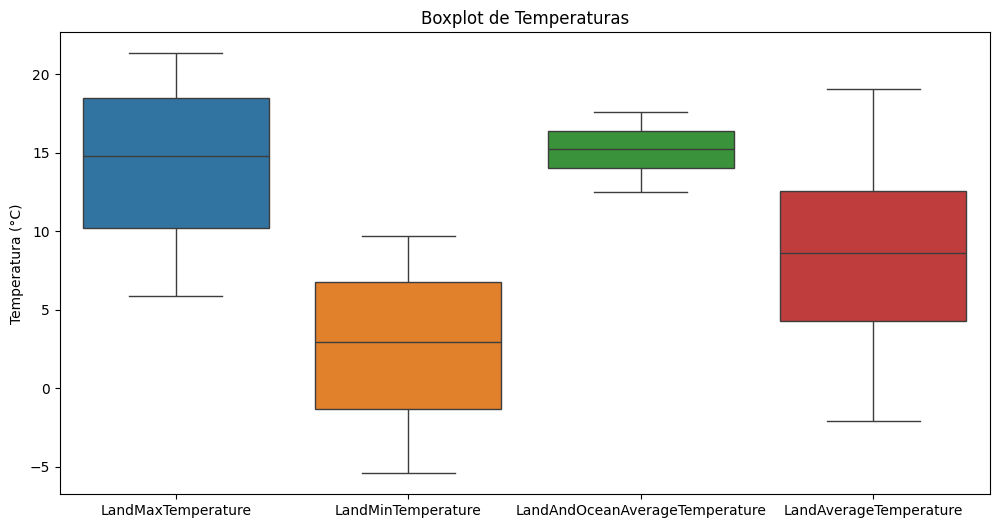

In [ ]:
# Boxplot para comparar temperaturas promedio
plt.figure(figsize=(12,6))
sns.boxplot(data=datos[["LandMaxTemperature","LandMinTemperature","LandAndOceanAverageTemperature", "LandAverageTemperature"]])
plt.title("Boxplot de Temperaturas")
plt.ylabel("Temperatura (°C)")
plt.show()

**Análisis de gráfico**: se observa una mayor dispersión de datos para la temperatura promedio terrestre mientras que la temperatura promedio terrestre y oceánica es más centrada en un rango acotado. Además, es posible notar que en la muestra no hay datos atípicos, o temperaturas extremas, pues no hay ningún círculo o punto que los denote en ningún boxplot.

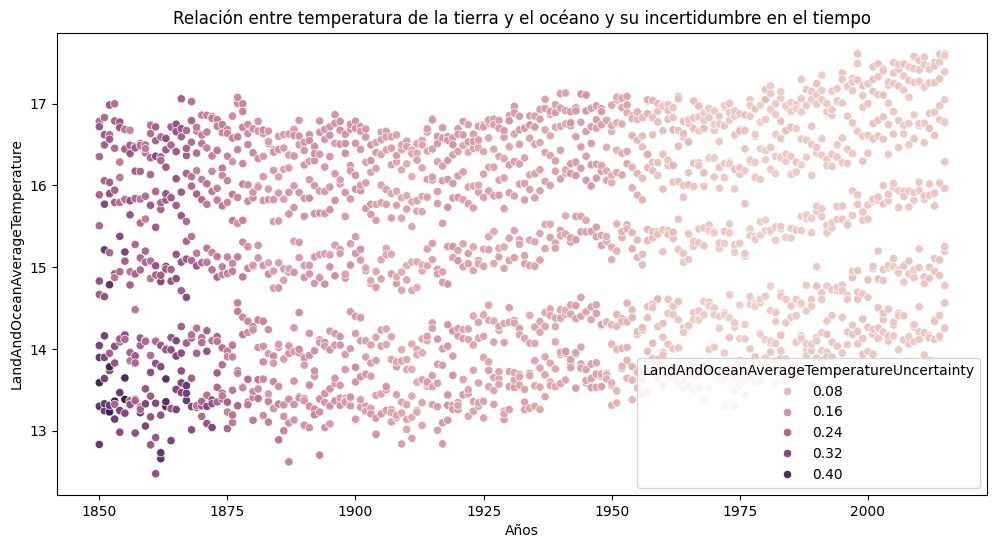

In [ ]:
# Scatter plot
datos["dt"] = pd.to_datetime(datos["dt"]) #*
datos["year"] = datos["dt"].dt.year #*
plt.figure(figsize=(12,6))
sns.scatterplot(x="year", y="LandAndOceanAverageTemperature", hue="LandAndOceanAverageTemperatureUncertainty" , data=datos)
plt.title("Relación entre temperatura de la tierra y el océano y su incertidumbre en el tiempo")
plt.xlabel("Años")
plt.show()

**Análisis de gráfico**: es posible observar que, a medida que el tiempo avanza, la incertidumbre de las mediciones baja considerablemente, lo que deja entrever una mejor capacidad, tanto tecnológica como intelectual, de realizar estas mediciones.


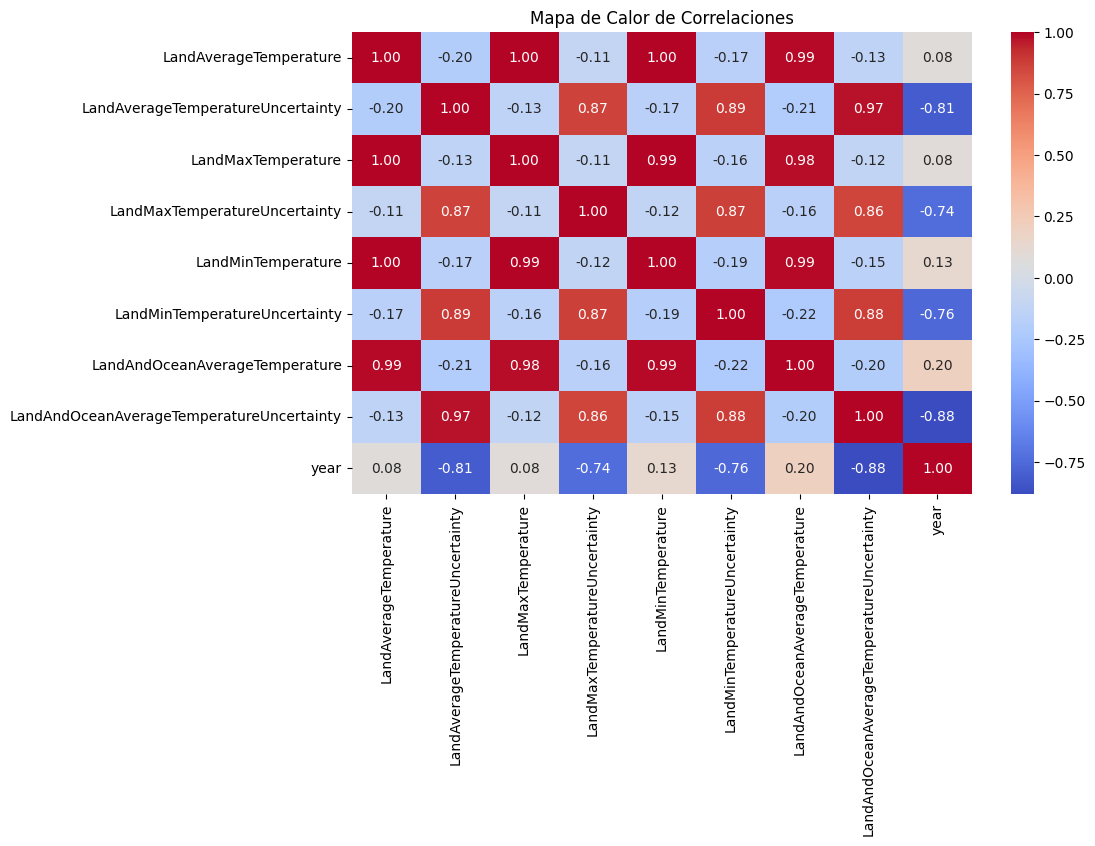

In [ ]:
# Heatmap
numeric_cols = datos.select_dtypes(include=[np.number])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()

# Análisis de correlación:
- **Correlación positiva muy fuerte** entre todas las mediciones de temperatura (promedio, máxima, mínima y combinada). Esto indica que se mueven juntas.
- **Correlación positiva fuerte entre 'year' y las temperaturas** (ej., +0.63 con 'LandAndOceanAverageTemperature'). Esto confirma matemáticamente la tendencia al calentamiento a lo largo del tiempo.
- **Correlación negativa entre 'year' y las incertidumbres**. Esto demuestra que la precisión de las mediciones ha mejorado con el paso de los años.

Implicaciones para Machine Learning:
La alta multicolinealidad entre las variables de temperatura sugiere que usar solo una de ellas (como 'LandAndOceanAverageTemperature') podría ser suficiente para entrenar un modelo predictivo, evitando la redundancia.



# Conclusiones e hipótesis:

Hallazgos Principales:
El análisis confirma una tendencia inequívoca y acelerada al calentamiento global desde 1750,
con un aumento particularmente rápido desde mediados del siglo XX. El siglo XXI se destaca como el
período más cálido registrado en este dataset.

Hipótesis para Futuras Investigaciones:
1.  **Predicción de Series Temporales:** Se podría desarrollar un modelo (como ARIMA o LSTM) para
    predecir las temperaturas globales en las próximas décadas.
2.  **Análisis de Causalidad:** Investigar la relación entre este aumento de temperatura y otros
    factores externos, como las emisiones de CO2 (utilizando datasets adicionales).

# Apéndice
Se utilizó ChatGPT en el scatter plot para mejorar el eje x de este. Las líneas nuevas que nos entregó, están denotadas por "#*".